# Data Set Description

# import All Required libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# import Data set using following command

In [5]:
df = pd.read_csv('C:\\Users\\Sunny\\Downloads\\Weather.csv')
df.head(3)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## taking out target data from the real data set

In [8]:
df = df[['MaxTemp', 'MinTemp']]

In [9]:
df.head()

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667


## check the shape of df, we use .shape

In [10]:
df.shape

(119040, 2)

## df contain 119040 rows and 2 columns.

## To see the statistical details of the datase, we use .describe()

In [12]:
df.describe()

,MaxTemp,MinTemp
count,119040.000000,119040.000000
mean,27.045111,17.789511
std,8.717817,8.334572
min,-33.333333,-38.333333
25%,25.555556,15.000000
50%,29.444444,21.111111
75%,31.666667,23.333333
max,50.000000,34.444444


## And finally, let’s plot our data points on a 2-D graph to eyeball our 
##    dataset and see if we can manually find any relationship between the data.

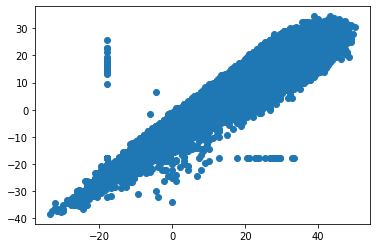

In [13]:
plt.scatter(df['MaxTemp'], df['MinTemp'])

## to observe the approximate average of our dependent variable let's plot a distribution plot

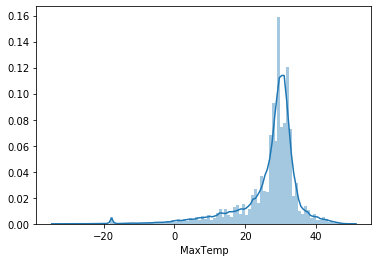

In [18]:
sns.distplot(df['MaxTemp'], bins=100, )

### according to distribution plot od MaxTemp can visualize the average  is arround 30

## Our next step is to divide the dataset into two parts one is independent variable i.e {MinTemp} and second one is 
##  dependent variable i.e {MaxTemp}

##  Values of independent variable stored in variable x 
## Values of dependent variable stored in variable y 

In [20]:
x = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values

### Spilt the whole data into training and testing data, using the following code
### 90% of data will be in moved in training data to fit the model rest will be in test data

In [21]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1)

### Now call the .fit() function of the LinearRegression class to fit the model using trai_x, train_y valuesss...

In [22]:
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### the model has been fitted , the now the values of y-intercept and coefficient using following codde

In [28]:
print('Coefficient is : ',lr.coef_[0])
print('Y-intercept is : ',lr.intercept_)

Coefficient is :  0.9182146765712503
Y-intercept is :  10.711401542254603


### predict the values of test_x  for testing the model, 

In [31]:
y_pred = lr.predict(test_x)

array([27.54533728, 25.50486022, 30.0959336 , ..., 30.0959336 ,
       26.01497949, 34.17688773])

### create a dataframe of Actual value and Predicted value of test_y

In [36]:
df1 = pd.DataFrame({'Actual values' : test_y, 
                    'Predicted values' : y_pred})
df1.head()

,Actual values,Predicted values
0,26.111111,27.545337
1,27.777778,25.504860
2,27.777778,30.095934
3,32.777778,32.646530
4,21.666667,29.075695


## visualization of Actual and predicted values using best fit Line

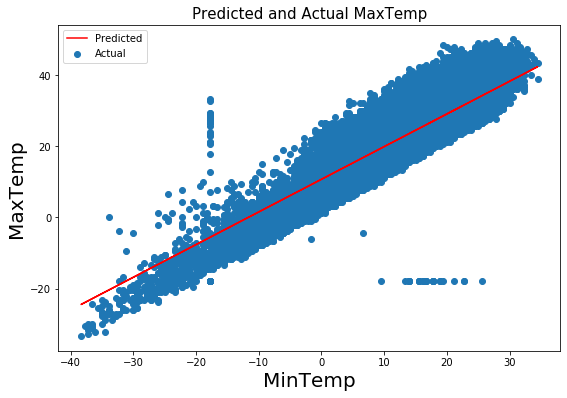

In [47]:
plt.figure(figsize=(9,6))
plt.scatter(x, y, label = 'Actual')
plt.plot(x, lr.predict(x), color= 'red', label = 'Predicted')
plt.xlabel('MinTemp', fontsize = 20)
plt.ylabel('MaxTemp', fontsize = 20)
plt.title('Predicted and Actual MaxTemp', fontsize = 15)
plt.legend()

In [45]:
### visualoize using scatter

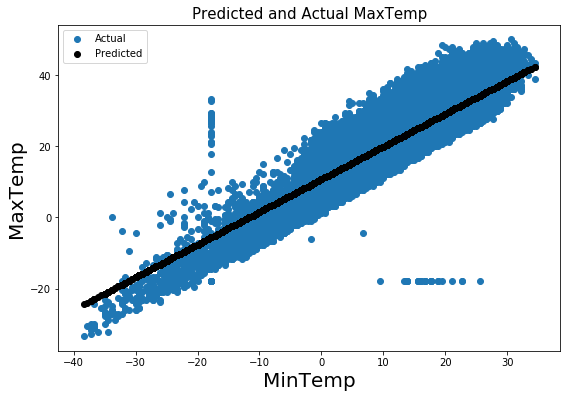

In [49]:
plt.figure(figsize=(9,6))
plt.scatter(x, y, label = 'Actual')
plt.scatter(x, lr.predict(x), color= 'Black', label = 'Predicted')
plt.xlabel('MinTemp', fontsize = 20)
plt.ylabel('MaxTemp', fontsize = 20)
plt.title('Predicted and Actual MaxTemp', fontsize = 15)
plt.legend()

## The final step is to evaluate the performance of the algorithm.

## For regression algorithms, three evaluation metrics are commonly used:
####   1. Mean Absolute Error 
####   2. Mean Squared Error
####   3. Root Mean Squared Error

In [51]:
## import modules to check evalution matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, 


In [77]:
mse = mean_squared_error(test_y, y_pred)
print('Mean Squared Error : ', mse)

Mean Squared Error :  17.601179752885848


In [57]:
mae = mean_squared_error(test_y, y_pred)
print('Mean Absolute Error : ', mae)

Mean Absolute Error :  17.601179752885848


In [58]:
print('Root Mean Squared error : ', mse**0.5)

Root Mean Squared error :  9.285008825633073


## make a data frame of errors

In [70]:
error = pd.DataFrame([mse, mae, (mse**0.5)], index=['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared error'], 
             columns=['Error'])
error

,Error
Mean Squared Error,86.211389
Mean Absolute Error,17.601180
Root Mean Squared error,9.285009


## check the Accuracy of model 

In [71]:
from sklearn.metrics import r2_score


In [74]:
print('accuray % of model : ', r2_score(test_y, y_pred) * 100)

accuray % of model :  77.5907094013465


# DECISION TREE REGRESSION

In [79]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(train_x, train_y)
reg.predict(test_x)
reg.score(test_x,test_y)*100

80.84944875081155